In [118]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io as sio
from scipy import signal
import copy
from scipy.interpolate import griddata
from matplotlib.pyplot import figure
from termcolor import colored
import matplotlib

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

In [119]:
# some references: https://www.udemy.com/course/signal-processing/learn/lecture/11869448#questions/13215742

[  1   4  15  28  69  99 127 174 237 249 299 324 315 338 345 350 345 378
 357 364 344 355 332 291 282 276 240 211 247 227 187 187 159 174 147 122
 125 122 105  97  94  97  82  72  68  74  61  49  38  58  53  33  46  44
  23  32  27  20  25  27  20  21  23  19  18   8  12  10  14   9  12  12
  13  16   6   8   5   7   4   6   8   6   4   3   6   2   5   3   3   4
   2   3   3   4   2   2   0   1   3   0   0   1   0   2   0   1   2   1
   1   1   1   1   2   0   1   1   0   2   0   1   0   0   0   0   1   1
   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   1]
[0.13157628 0.17146268 0.21134907 0.25123547 0.29112187 0.33100826
 0.37089466 0.41078105 0.45066745 0.49055385 0.53044024 0.57032664
 0.61021303 0.65009943 0.68998583 0.72987222 0.76975862 0.80964501
 0.84953141 0.88941781 0.9293042  0.9691906  1.00907699 1.04896339
 1.08884979 1.12873618 1.16862258 1.20850897 1.24839537 1.28828176
 1.32816816 1.36805456 1.40794095 1.44782735 1.48771374

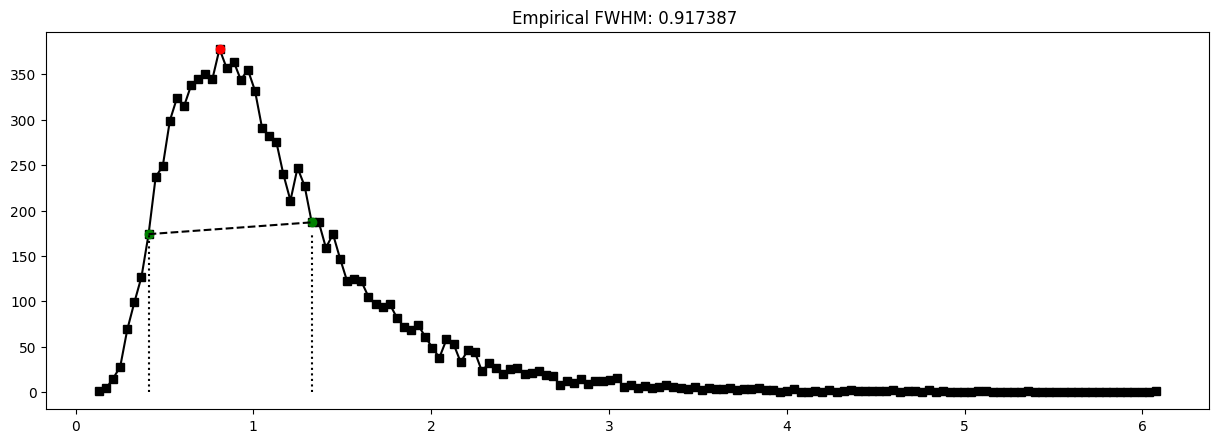

In [120]:
## example with asymmetric shape

# generate asymmetric distribution
fx,x = np.histogram(np.exp(.5*np.random.randn(10000,1)),150)
print(fx)
print(x)
print(fx.shape)
print(x.shape)

# normalization necessary here!
fxNorm = fx/np.max(fx)

# plot the function
plt.plot(x[0:-1],fx,'ks-')


# find peak point
peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]


# find 50% PREpeak point
prepeak = np.argmin((fxNorm[:peakpnt]-.5)**2)


# find 50% POSTpeak point
pstpeak = np.argmin((fxNorm[peakpnt:-1]-.5)**2)
pstpeak = pstpeak + peakpnt  # adjust


# compute empirical FWHM
fwhmE = x[pstpeak] - x[prepeak]



# plot the points
plt.plot(x[peakpnt],fx[peakpnt],'ro')
plt.plot(x[prepeak],fx[prepeak],'go')
plt.plot(x[pstpeak],fx[pstpeak],'go')


# plot line for reference
plt.plot([x[prepeak],x[pstpeak]],[fx[prepeak], fx[pstpeak]],'k--')
plt.plot([x[prepeak],x[prepeak]],[0, fx[prepeak]],'k:')
plt.plot([x[pstpeak],x[pstpeak]],[0, fx[prepeak]],'k:')

plt.title('Empirical FWHM: %g ' %fwhmE)
plt.show()

7
32
0.4107810542649029
1.407940952419688


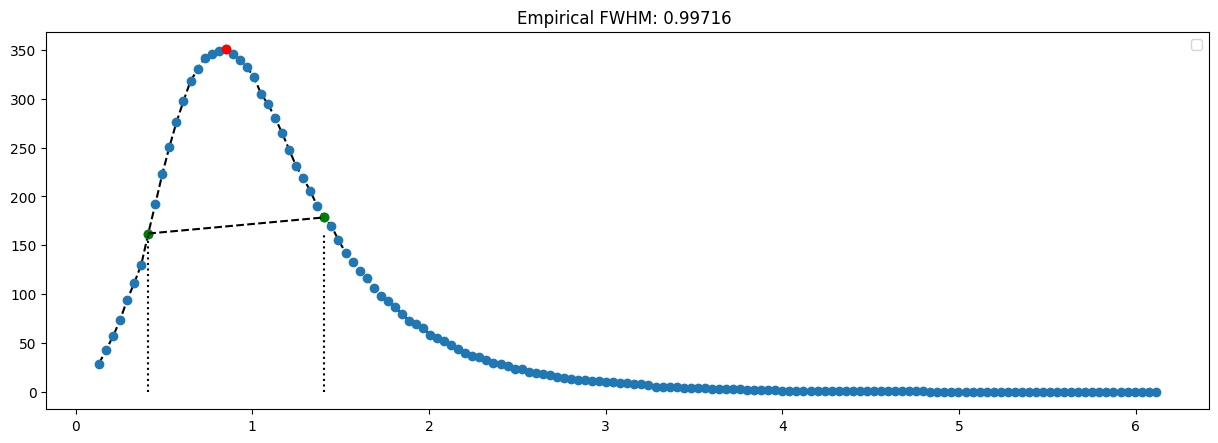

In [128]:
# initialize filtered signal vector
n = len(x)
meanSig = np.zeros(n)
srate = 1
time = x

# implement the running mean filter
k = 5 # filter window is actually k*2+1
for i in range(0,n):
    # each point is the average of k surrounding points
    # original approach

    left_bound = max(1, i-k)
    right_bound = min(i+k, n)
    meanSig[i] = np.mean(fx[left_bound:right_bound])

plt.plot(time, meanSig, 'k--')
plt.plot(time, meanSig, 'o')
plt.legend()


fxNorm = meanSig/np.max(meanSig)

# find peak point
peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]


# find 50% PREpeak point
prepeak = np.argmin((fxNorm[:peakpnt]-.5)**2)


# find 50% POSTpeak point
pstpeak = np.argmin((fxNorm[peakpnt:-1]-.5)**2)
pstpeak = pstpeak + peakpnt  # adjust
print(prepeak)
print(pstpeak)
print(time[prepeak])
print(time[pstpeak])

# plot the points
plt.plot(time[peakpnt],meanSig[peakpnt],'ro')
plt.plot(time[prepeak],meanSig[prepeak],'go')
plt.plot(time[pstpeak],meanSig[pstpeak],'go')
# plot line for reference
plt.plot([time[prepeak],time[pstpeak]],[meanSig[prepeak], meanSig[pstpeak]],'k--')
plt.plot([time[prepeak],time[prepeak]],[0, meanSig[prepeak]],'k:')
plt.plot([time[pstpeak],time[pstpeak]],[0, meanSig[prepeak]],'k:')


# compute empirical FWHM
fwhmE = time[pstpeak] - time[prepeak]
plt.title('Empirical FWHM: %g ' %fwhmE)
plt.show()

30
130
0.42923595387254376
1.4214348575091458


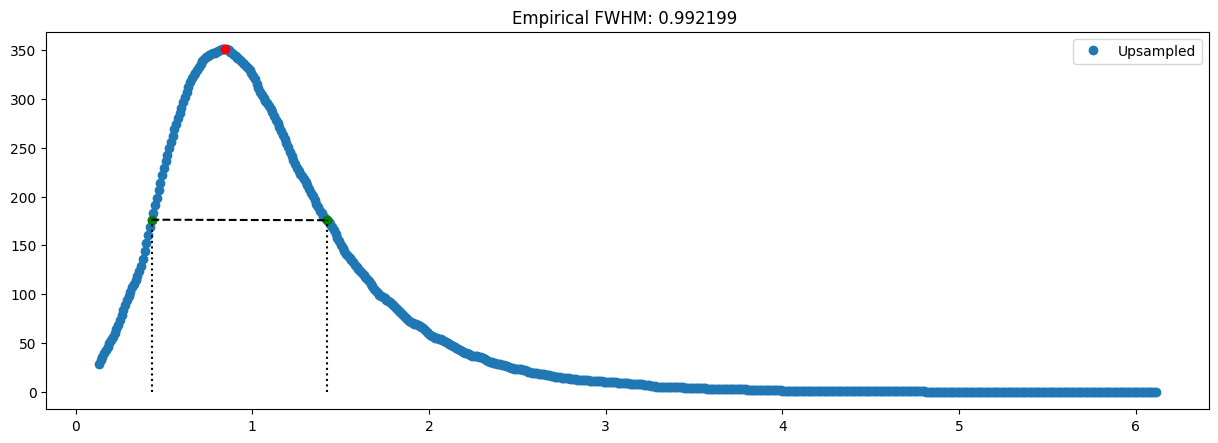

In [131]:
upsampleFactor = 4
newTime = np.linspace(time[0],time[-1],len(time)*upsampleFactor)

# interpolate using griddata
interpolatedData = griddata(time, meanSig, newTime, method='cubic')

# plot the upsampled signal
plt.plot(newTime, interpolatedData,'o',label='Upsampled')


## calculate new FWHM

# normalization necessary here!
fxNorm = interpolatedData/np.max(interpolatedData)

# find peak point
peakpnt = np.where( fxNorm==np.max(fxNorm) )[0][0]

# find 50% PREpeak point
prepeak = np.argmin((fxNorm[:peakpnt]-.5)**2)

# find 50% POSTpeak point
pstpeak = np.argmin((fxNorm[peakpnt:-1]-.5)**2)
pstpeak = pstpeak + peakpnt  # adjust

print(prepeak)
print(pstpeak)
print(newTime[prepeak])
print(newTime[pstpeak])

# compute empirical FWHM
fwhmE = newTime[pstpeak] - newTime[prepeak]

# plot the points
plt.plot(newTime[peakpnt],interpolatedData[peakpnt],'ro')
plt.plot(newTime[prepeak],interpolatedData[prepeak],'go')
plt.plot(newTime[pstpeak],interpolatedData[pstpeak],'go')
# plot line for reference
plt.plot([newTime[prepeak],newTime[pstpeak]],[interpolatedData[prepeak], interpolatedData[pstpeak]],'k--')
plt.plot([newTime[prepeak],newTime[prepeak]],[0, interpolatedData[prepeak]],'k:')
plt.plot([newTime[pstpeak],newTime[pstpeak]],[0, interpolatedData[prepeak]],'k:')

plt.title('Empirical FWHM: %g ' %fwhmE)

plt.legend()
plt.show()

